In [1]:
import typing
import numpy as np
import scipy.interpolate
from numba import njit
import matplotlib.pyplot as plt
import memtools

In [2]:
gammas = np.array([2153.04699568, 11519.97063834, 42295.4894054, 236354.6469527, 57311.56052899])
tgammas = np.array([6.79235552e-3, 4.55612961, 4.03365040e1, 3.99256311e2, 4.96582603e3])
ks = gammas / tgammas
mass = 31.34617
values, fe = np.load('ala9_fe.npy')
kbt = 2.494
fe = fe * kbt
dt = 0.001
steps_sim = int(1e9)
steps_equil = int(1e8)
stride = 1000
cs = scipy.interpolate.CubicSpline(values, fe)
spl_m = cs.c.T

In [3]:
# equilibrate
traj, v0, y0 = memtools.integrate(
    x0=0.3,
    v0=np.sqrt(kbt / mass) * np.random.normal(),
    y0=np.zeros_like(gammas),
    steps=steps_equil,
    dt=dt,
    mass=mass,
    kbt=kbt,
    gammas=gammas,
    ks=ks,
    spl_m=spl_m,
    values=values,
    stride=stride,
)
x0 = traj[-1]
del traj

In [4]:
# equilibrate
traj, __, ___ = memtools.integrate(
    x0=x0,
    v0=v0,
    y0=y0,
    steps=steps_sim,
    dt=dt,
    mass=mass,
    kbt=kbt,
    gammas=gammas,
    ks=ks,
    spl_m=spl_m,
    values=values,
    stride=stride,
)

Text(0, 0.5, '$q$ [nm]')

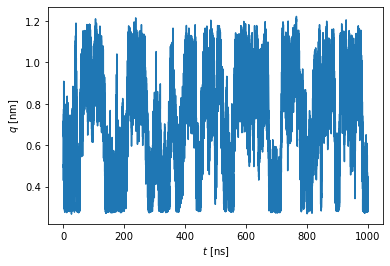

In [5]:
plt.plot(np.arange(len(traj)) * dt * stride / 1000, traj)
plt.xlabel(r'$t$ [ns]')
plt.ylabel(r'$q$ [nm]')

In [6]:
mfpt, mfpt_err = memtools.calc_mfpt(traj, 0.32, 0.99, 20, 1.)

AttributeError: module 'memtools' has no attribute 'calc_mfpt'

In [ ]:
fig, axes = plt.subplots(1, 1)
axes.plot(np.linspace(0.32, 0.99, 20), mfpt[0] / 1000)
axes.plot(np.linspace(0.32, 0.99, 20), mfpt[1] / 1000)
axes.semilogy()
axes.set(xlabel='$q_f$', ylabel=r'$\tau_{\mathrm{MFPT}}$')
axtwin = ax.twinx()
axtwin.plot(values, fe - fe.min(), color='0.4')
axtwin.ylabel('F [kJ / mol]')
axtwin.ylim(-0.5 , 4)